In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/clusterss/clustering-data

/content/drive/MyDrive/clusterss/clustering-data


In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [ ]:
! unzip /content/drive/MyDrive/clusterss/clustering-data/netflix_titles.csv.zip

Archive:  /content/drive/MyDrive/clusterss/clustering-data/netflix_titles.csv.zip
  inflating: netflix_titles.csv      


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (entrenamiento): 0.364178321022618
Silhouette Score (prueba): 0.35278242596624376


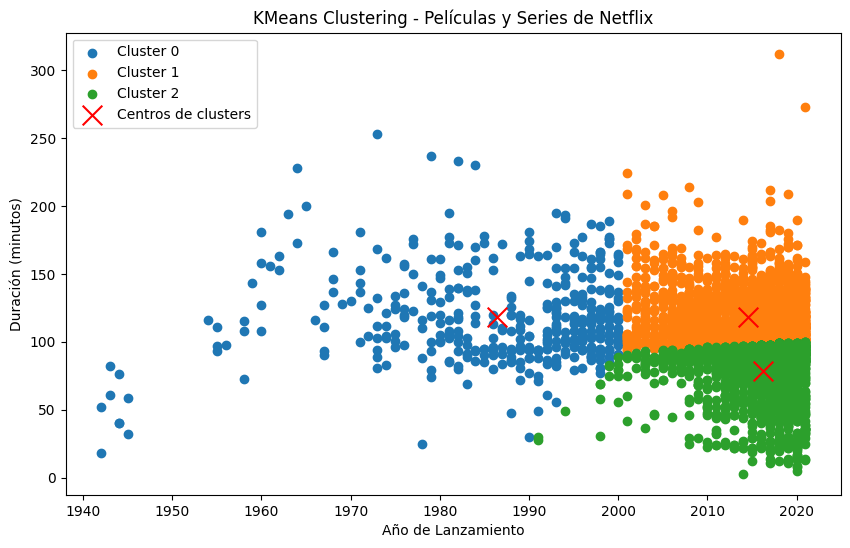

In [3]:
# Paso 1: Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Paso 2: Cargar el conjunto de datos
# Asume que tienes un DataFrame llamado 'netflix_data' con columnas relevantes
netflix_data = pd.read_csv('/content/drive/MyDrive/clusterss/clustering-data/netflix_titles.csv')  # Reemplaza con la ubicación real del archivo CSV

# Preprocesamiento de la columna 'duration' para extraer el valor numérico
netflix_data['duration'] = netflix_data['duration'].str.replace(' min', '')
netflix_data['duration'] = pd.to_numeric(netflix_data['duration'], errors='coerce')  # Convertir a números y manejar errores

# Eliminar filas con valores faltantes en la columna 'duration'
netflix_data.dropna(subset=['duration'], inplace=True)

# Rellenar valores faltantes en la columna 'release_year' con la mediana
netflix_data['release_year'].fillna(netflix_data['release_year'].median(), inplace=True)

# Rellenar valores faltantes en las columnas 'rating' y 'country' con valores más comunes
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)
netflix_data['country'].fillna(netflix_data['country'].mode()[0], inplace=True)

# Asumiendo que 'X' contiene las características relevantes para el clustering
X = netflix_data[['release_year', 'duration']]  # Usando el año de lanzamiento y la duración

# Guardar los valores originales para la visualización
X_original = X.copy()

# Paso 3: Preprocesamiento de datos (normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, X_original_train, X_original_test = train_test_split(X_scaled, X_original, test_size=0.2, random_state=42)

# Crear el modelo KMeans
num_clusters = 3  # Número de clusters deseados
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
kmeans.fit(X_train)

# Obtener las etiquetas de los clusters y los centros para los datos de prueba
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)
cluster_centers = kmeans.cluster_centers_

# Evaluación del clustering utilizando el coeficiente de silueta
train_silhouette_score = silhouette_score(X_train, train_cluster_labels)
test_silhouette_score = silhouette_score(X_test, test_cluster_labels)

print(f"Silhouette Score (entrenamiento): {train_silhouette_score}")
print(f"Silhouette Score (prueba): {test_silhouette_score}")

# Obtener los datos originales (sin escalar) para la visualización
X_original_train = pd.DataFrame(X_original_train, columns=['release_year', 'duration'])
X_original_test = pd.DataFrame(X_original_test, columns=['release_year', 'duration'])

# Visualización de resultados
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = X_original_train[train_cluster_labels == cluster_label]
    plt.scatter(cluster_data['release_year'], cluster_data['duration'], label=f'Cluster {cluster_label}')

# Graficar los centros de los clusters
cluster_centers_original = scaler.inverse_transform(cluster_centers)
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], marker='x', s=200, color='red', label='Centros de clusters')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.title('KMeans Clustering - Películas y Series de Netflix')
plt.legend()
plt.show()


In [4]:
# Obtener los valores de mean y scale
mean_ = scaler.mean_
scale_ = scaler.scale_

print("Mean:", mean_)
print("Scale:", scale_)

Mean: [2013.12108355   99.57718668]
Scale: [ 9.67950983 28.28828505]


In [5]:
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Paso 2: Preparar los nuevos datos de entrada
new_data = {
    'release_year': 1944,
    'duration': 76 ,
}

new_data_df = pd.DataFrame([new_data])
X_new = new_data_df[['release_year', 'duration']]
#X_new['duration'] = X_new['duration'].str.replace(' min', '').astype(float)
X_new_scaled = scaler.transform(X_new)

# Paso 3: Utilizar el modelo KMeans para predecir el cluster de los nuevos datos
predicted_cluster = kmeans.predict(X_new_scaled)
print(f"Los nuevos datos pertenecen al cluster {predicted_cluster[0]}")


Los nuevos datos pertenecen al cluster 0


In [ ]:
# Obtener los centroides de los clústeres
centroides = kmeans.cluster_centers_

# Guardar los centroides en un archivo JSON
with open("model.json", "w") as f:
    json.dump(centroides.tolist(), f)

In [6]:
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

''' # Paso 1: Guardar los centroides en un archivo JSON
centroides = [[-2.7593363418974115, 0.6508082929330368],
              [0.15086521596809574, 0.6519676642757946],
              [0.3235234100274312, -0.755147785413866]] '''



# Paso 2: Preparar los nuevos datos de entrada
new_data = {
    'release_year': 1944,
    'duration': 76
}

new_data_df = pd.DataFrame([new_data])
X_new = new_data_df[['release_year', 'duration']]

# Simular el ajuste del StandardScaler (normalmente, esto se hace con datos de entrenamiento)
# Para simplificar, asumimos que tenemos los parámetros de escala y media de los datos originales
scaler = StandardScaler()
# Suponiendo que estos son los parámetros de escala y media obtenidos durante el entrenamiento
scaler.mean_ = np.array([2000, 100])
scaler.scale_ = np.array([10, 20])

# Normalizar los nuevos datos utilizando el mismo escalador
X_new_scaled = scaler.transform(X_new)

# Paso 3: Calcular las distancias a los centroides cargados desde el archivo JSON
with open("/content/drive/MyDrive/clusterss/clustering-data/model.json", "r") as f:
    centroides = np.array(json.load(f))

# Calcular las distancias a los centroides
distancias = np.linalg.norm(X_new_scaled - centroides, axis=1)

# Obtener el clúster más cercano
predicted_cluster = np.argmin(distancias)

print(f"Los nuevos datos pertenecen al cluster {predicted_cluster}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Los nuevos datos pertenecen al cluster 0


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip freeze > requirements.txt